# Proyek UAS PMDPM

<b>Harap jangan menghapus cell dan komentar yang diberikan!</b>

Setiap cell markdown dan code akan berisi instruksi pengerjaan Proyek UAS PMDPM

Dalam notebook ini Anda akan diminta untuk membuat sebuah proyek Pembelajaran Mesin menggunakan dataset yang sudah disediakan. Proyek akan terdiri dari proses inisialisasi, data loading, data cleansing, feature engineering, modelling dan evaluasi model. Pada bagian akhir silahkan berikan laporan singkat dari proyek yang sudah dikerjakan

## Penjelasan Tugas

Terapkan pemrosesan dataset dari loading, data cleansing (jika perlu), data scaling, feature selection, hingga evaluasi model secara sederhana menggunakan code yang sudah dipelajari dalam latihan-latihan dan tugas.

### Inisialisasi

Bagian berikut berisi import library yang dibutuhkan

In [158]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.multiclass import OneVsRestClassifier
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report,confusion_matrix


### Data Loading

Bagian berikut berisi proses data loading (boleh dengan file upload atau dengan mount drive), jangan lupa tampilkan 20 baris data teratas!

In [159]:
#loading data yang akan diolah

df_paris_housing = pd.read_csv("paris_housing2000.csv")
df_paris_housing.head(20)

,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,3,4,1995,N,Y,3114,1258,264,Y,9,10313.5,Basic
1,9,1,2011,N,Y,9390,6219,922,N,9,13229.1,Basic
2,1,4,2003,Y,N,2239,2795,951,Y,7,14431.3,Basic
3,6,2,1990,N,N,6861,5769,442,N,5,15488.0,Basic
4,6,9,1992,Y,Y,6618,7045,939,Y,10,16799.2,Basic
5,5,2,2010,Y,N,4426,5336,911,N,4,17071.0,Basic
6,4,3,1990,Y,N,6022,8521,391,Y,3,17363.0,Basic
7,6,3,2000,N,N,2325,6230,536,N,9,18985.0,Basic
8,2,2,2020,N,Y,8598,3119,268,N,10,19638.0,Basic
9,7,6,1995,N,Y,2675,6452,724,Y,2,19788.5,Basic


In [160]:
df_paris_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cityPartRange      2000 non-null   int64  
 1   numPrevOwners      2000 non-null   int64  
 2   made               2000 non-null   int64  
 3   isNewBuilt         2000 non-null   object 
 4   hasStormProtector  2000 non-null   object 
 5   basement           2000 non-null   int64  
 6   attic              2000 non-null   int64  
 7   garage             2000 non-null   int64  
 8   hasStorageRoom     2000 non-null   object 
 9   hasGuestRoom       2000 non-null   int64  
 10  price              2000 non-null   float64
 11  category           2000 non-null   object 
dtypes: float64(1), int64(7), object(4)
memory usage: 187.6+ KB


In [161]:
#bersihkan dataset menggunakan metode yang sudah dipelajari
df_paris_housing.isna().sum()

cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
category             0
dtype: int64

In [162]:
df_paris_housing.duplicated().sum()

0

### Data Visualization

Dalam proses visualisasi data, silahkan visualisasikan feature menggunakan plot yang sesuai agar mendapat insight dari data dengan menjawab pertanyaan-pertanyaan berikut:

    untuk sub A:
    1. Bagaimana perbandingan median luas basement rumah berdasarkan tipe rumahnya (Basic dan Luxury)?
    2. Bagaimana komposisi jumlah rumah yang baru dibangun atau tidak pada tipe rumah Luxury?
   

    untuk sub B:
    1. Bagaimana perbandingan median luas loteng rumah berdasarkan tipe rumahnya (Basic dan Luxury)
    2. Bagaimana komposisi jumlah rumah yang memiliki pelindung badai atau tidak pada tipe rumah Basic?
   

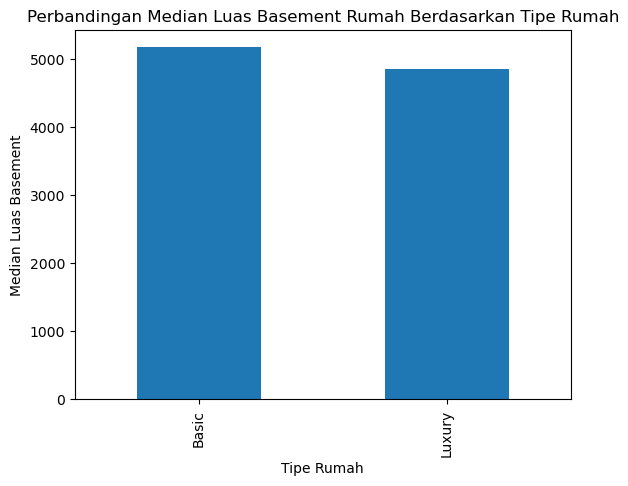

Median Luas Basement Rumah Tipe Basic :  5170.0
Median Luas Basement Rumah Tipe Luxury :  4847.5


In [163]:
#1. visualisasi fitur menggunakan metode yang sudah dipelajari

median_basement = df_paris_housing.groupby('category')['basement'].median()
median_basement.plot.bar()
plt.title('Perbandingan Median Luas Basement Rumah Berdasarkan Tipe Rumah')
plt.xlabel('Tipe Rumah')
plt.ylabel('Median Luas Basement')
plt.show()
print("Median Luas Basement Rumah Tipe Basic : ", median_basement['Basic'])
print("Median Luas Basement Rumah Tipe Luxury : ", median_basement['Luxury'])

1000


0


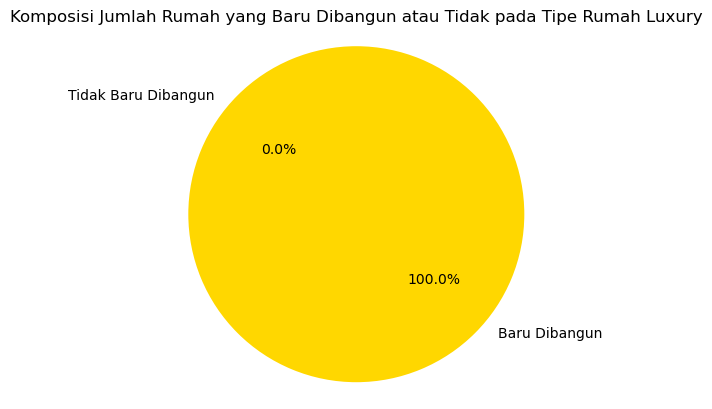

In [164]:
#2 komposisi jumlah rumah yang baru dibangun atau tidak pada tipe rumah Luxury


isBuilt_Y = int(0)
isBuilt_N = int(0)

for i in range(len(df_paris_housing)) :
    if df_paris_housing['category'][i] == 'Luxury' :
       if df_paris_housing['isNewBuilt'][i] == 'Y' :
        isBuilt_Y += 1
       else :
        isBuilt_N += 1

print(isBuilt_Y)
print(isBuilt_N)

labels = 'Baru Dibangun' , 'Tidak Baru Dibangun'
sizes = [isBuilt_Y, isBuilt_N]
colors = ['gold', 'yellowgreen']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Komposisi Jumlah Rumah yang Baru Dibangun atau Tidak pada Tipe Rumah Luxury')
plt.show()


### Deskripsi Data Visualization
Berikan keterangan atau deskripsi singkat mengenai informasi yang diperoleh dari visualisasi data tersebut. Jawablah pertanyaan di atas pada cell markdown ini!

    untuk sub A:
    1. Bagaimana perbandingan median luas basement rumah berdasarkan tipe rumahnya (Basic dan Luxury)?
    => Median luas basement pada Rumah tipe Basic lebih luas dari pada Luxury
        Median Luas Basement Rumah Tipe Basic :  5170.0
        Median Luas Basement Rumah Tipe Luxury :  4847.5
    2. Bagaimana komposisi jumlah rumah yang baru dibangun atau tidak pada tipe rumah Luxury?
    => Seluruh rumah tipe Luxury baru dibangun / bangunan Baru
        Jumlah Rumah Luxury yang Baru Dibangun :  100
        Jumlah Rumah Luxury yang Tidak Baru Dibangun :  0


### Data Cleansing

Bagian berikut berisi proses pembersihan data (jika diperlukan, minimal cek apakah ada data yang kosong atau duplikat). Drop feature yang berlaku sebagai unique identifier (CityCode) dan drop feature Price. Lakukan OneHotEncoder untuk data kategorik string. Pisahkan juga label dengan feature!

In [165]:
df_paris_housing.isna().sum().sum()

0

In [166]:
df_paris_housing.duplicated().sum()

0

### Train-test split

> Untuk sub A: random_state train_test_split gunakan 2 digit terakhir NPM terbesar di sub kelompok  

> Untuk sub B: random_state train_test_split gunakan 2 digit terakhir NPM terkecil di sub kelompok 

In [167]:
# NPM : 210711228 210711306
X = df_paris_housing.drop(['cityPartRange','price','category'], axis=1)
Y = df_paris_housing['category']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=6)
print(X_train.shape)
print(X_test.shape)

(1600, 9)
(400, 9)


In [168]:
categorical = ['isNewBuilt','hasStormProtector','hasStorageRoom']

trasformer = make_column_transformer(
    (OneHotEncoder(), categorical),
    remainder='passthrough'
)

X_train_Enc = trasformer.fit_transform(X_train)
X_test_Enc = trasformer.transform(X_test)

df_train_enc = pd.DataFrame(X_train_Enc, columns=trasformer.get_feature_names_out())
df_test_enc = pd.DataFrame(X_test_Enc, columns=trasformer.get_feature_names_out())

In [169]:
transform_target = preprocessing.LabelEncoder()
Y_train_to_numerik = transform_target.fit_transform(Y_train)
Y_test_to_numerik = transform_target.transform(Y_test)

### Modelling

Gunakan Pipeline untuk modelling dan grid search cross-validation untuk pemilihan model terbaik. Gunakan Stratified K-fold Cross Validation dengan nilai n_splits=5. Pipeline terdiri atas data scaling, feature selection, dan classifier. Buatlah 2 Pipeline dan 2 GridSearchCV untuk masing-masing kombinasi berikut.

>Step data scaling untuk membandingkan perlunya data scaling atau tidak. Gunakan dua nilai pada parameter grid yaitu: [None,Scaler]. Untuk sub A: gunakan StandardScaler. Untuk sub B: gunakan MinMaxScaler

>Step feature selection untuk membandingkan metode feature selection yang digunakan. Gunakan dua metode pada parameter grid yaitu: [None,Selector]. Untuk sub A: gunakan SelectKBest dengan ketentuan k minimal 2, maksimal n-1. Untuk sub B: gunakan SelectPercentile dengan ketentuan persentil minimal 30%, maksimal 80%. Kalian juga perlu melakukan setting parameter grid nilai k atau percentile-nya.

>Step classifier untuk membandingkan algoritme classifier. Eksplorasi pengaturan parameter yang ada pada algoritme yang akan Anda gunakan, tidak terbatas pada 1-2 parameter saja supaya optimal (selain random_state). Silahkan bereksperimen untuk parameter seperti n_estimators, max_depth untuk tree-based classifier; C untuk Logistic Regression; dan C, gamma, serta kernel untuk SVM agar mendapat akurasi terbaik.

> Sub A: RandomForestClassifier(n_estimators=bebas minimal 50, random_state= dua digit terakhir NPM terbesar dalam sub kelompok, max_depth=bebas, criterion='entropy') dan LogisticRegression(C=bebas, max_iter=10000, class_weight='balanced')

> Sub B: K-Nearest Neighbors(n_neighbors=bebas, weights='distance') dan SVC(C=bebas, gamma=bebas, class_weight='balanced')

>Tampilkan best estimator dan nilai best score dari kedua grid-search cross-validation. Fit best estimator pada train set kemudian ujikan pada test set dengan fungsi score. Format score 3 digit di belakang koma (.3f).

In [170]:
#cell code ini untuk proses pembuatan model pipeline & grid search 1
#NPM : 210711228 210711306
scaler_model_1 = StandardScaler()
selector_model_1 = SelectKBest(k = 3)
classifier_model_1 = RandomForestClassifier(n_estimators=100, random_state=6, max_depth=10, criterion='entropy')

pipeline_model_1 = Pipeline([
    ('scaler', scaler_model_1),
    ('Feature_Selection', selector_model_1),
    ('Classifier', classifier_model_1)
])

estimator = pipeline_model_1.fit(X_train_Enc, Y_train_to_numerik)
parameter = {
    'scaler' : [None, scaler_model_1],
    'Feature_Selection' : [selector_model_1],
    'Classifier__n_estimators' : [50, 100, 200],
    'Classifier__max_depth' : [10, 20, 50],
    'Classifier__criterion' : ['gini', 'entropy']
}

skfold = StratifiedKFold(n_splits=5)

grid_search_model_1 = GridSearchCV(
    estimator = pipeline_model_1,
    param_grid = parameter,
    cv = skfold
)
grid_search_model_1.fit(X_train_Enc, Y_train_to_numerik)
print("Best params : ", grid_search_model_1.best_params_)
print("Best score : %.3f" %grid_search_model_1.best_score_)
print("Best Estimator : ", grid_search_model_1.best_estimator_)
print("Score train set : %.3f" %grid_search_model_1.score(X_train_Enc, Y_train_to_numerik))
print("Score test set : %.3f" %grid_search_model_1.score(X_test_Enc, Y_test_to_numerik))

Best params :  {'Classifier__criterion': 'entropy', 'Classifier__max_depth': 10, 'Classifier__n_estimators': 200, 'Feature_Selection': SelectKBest(k=3), 'scaler': None}
Best score : 0.776
Best Estimator :  Pipeline(steps=[('scaler', None), ('Feature_Selection', SelectKBest(k=3)),
                ('Classifier',
                 RandomForestClassifier(criterion='entropy', max_depth=10,
                                        n_estimators=200, random_state=6))])
Score train set : 0.778
Score test set : 0.807


In [171]:
if grid_search_model_1.best_params_['Feature_Selection'] != None:
    mask_model_1 = grid_search_model_1.best_estimator_.named_steps['Feature_Selection'].get_support()
    select_feature_model_1 = df_train_enc.columns[mask_model_1]
    print(select_feature_model_1)
else:
    print("Tidak ada feature selection")

Index(['onehotencoder__isNewBuilt_N', 'onehotencoder__isNewBuilt_Y',
       'remainder__hasGuestRoom'],
      dtype='object')


In [172]:
#cell code ini untuk proses pembuatan model pipeline & grid search 2
scaler_model_2 = StandardScaler()
selector_model_2 = SelectKBest(k = 3)
classifier_model_2 = LogisticRegression(max_iter=10000, class_weight='balanced', C=100)

pipeline_model_2 = Pipeline([
    ('scaler', scaler_model_2),
    ('Feature_Selection', selector_model_2),
    ('classifier', classifier_model_2)
])

estimator_model_2 = pipeline_model_2.fit(X_train_Enc, Y_train_to_numerik)

parameter_grid_model_2 = {
    'scaler': [None, scaler_model_2],
    'Feature_Selection': [selector_model_2],
    'classifier__C': [1,10, 100],
}

grid_search_model_2 = GridSearchCV(
    estimator= estimator_model_2,
    param_grid= parameter_grid_model_2,
    cv= StratifiedKFold(n_splits=5),
    scoring='accuracy'
)

grid_search_model_2.fit(X_train_Enc, Y_train_to_numerik)

print("Best params : ", grid_search_model_2.best_params_)
print("Best score : %.3f" %grid_search_model_2.best_score_)
print("Best estimator : ", grid_search_model_2.best_estimator_)
print("Score train set : %.3f" %grid_search_model_2.score(X_train_Enc, Y_train_to_numerik))
print("Score test set : %.3f" %grid_search_model_2.score(X_test_Enc, Y_test_to_numerik))

Best params :  {'Feature_Selection': SelectKBest(k=3), 'classifier__C': 1, 'scaler': None}
Best score : 0.778
Best estimator :  Pipeline(steps=[('scaler', None), ('Feature_Selection', SelectKBest(k=3)),
                ('classifier',
                 LogisticRegression(C=1, class_weight='balanced',
                                    max_iter=10000))])
Score train set : 0.778
Score test set : 0.807


In [173]:
if grid_search_model_2.best_params_['Feature_Selection'] != None:
    mask_model_2 = grid_search_model_2.best_estimator_.named_steps['Feature_Selection'].get_support()
    select_feature_v2 = df_train_enc.columns[mask_model_2]
    print(select_feature_v2)
else:
    print("Tidak ada feature selection")


Index(['onehotencoder__isNewBuilt_N', 'onehotencoder__isNewBuilt_Y',
       'remainder__hasGuestRoom'],
      dtype='object')


### Evaluasi Model

Bagian berikut berisi evaluasi model menggunakan classification report dan skor AUC. Tampilkan classification report dan AUC dari best estimator yang diperoleh masing-masing grid search!

In [174]:
#lakukan proses evaluasi model algoritme pembelajaran 1

gs_Predict_model_1 = grid_search_model_1.predict(X_test_Enc)
Label = ['Basic', 'Luxury']

print("Confusion Matrix : \n", confusion_matrix(Y_test_to_numerik, gs_Predict_model_1))
print("Classification Report : \n", classification_report(Y_test_to_numerik, gs_Predict_model_1, target_names=Label))

Confusion Matrix : 
 [[107  77]
 [  0 216]]
Classification Report : 
               precision    recall  f1-score   support

       Basic       1.00      0.58      0.74       184
      Luxury       0.74      1.00      0.85       216

    accuracy                           0.81       400
   macro avg       0.87      0.79      0.79       400
weighted avg       0.86      0.81      0.80       400



In [175]:

clf_model_1 = OneVsRestClassifier(grid_search_model_1.best_estimator_)
clf_model_1.fit(X_train_Enc, Y_train_to_numerik)
y_score_model_1 = clf_model_1.predict(X_test_Enc)

print("ROC AUC Score : %0.3f" %roc_auc_score(Y_test_to_numerik, y_score_model_1))


ROC AUC Score : 0.791


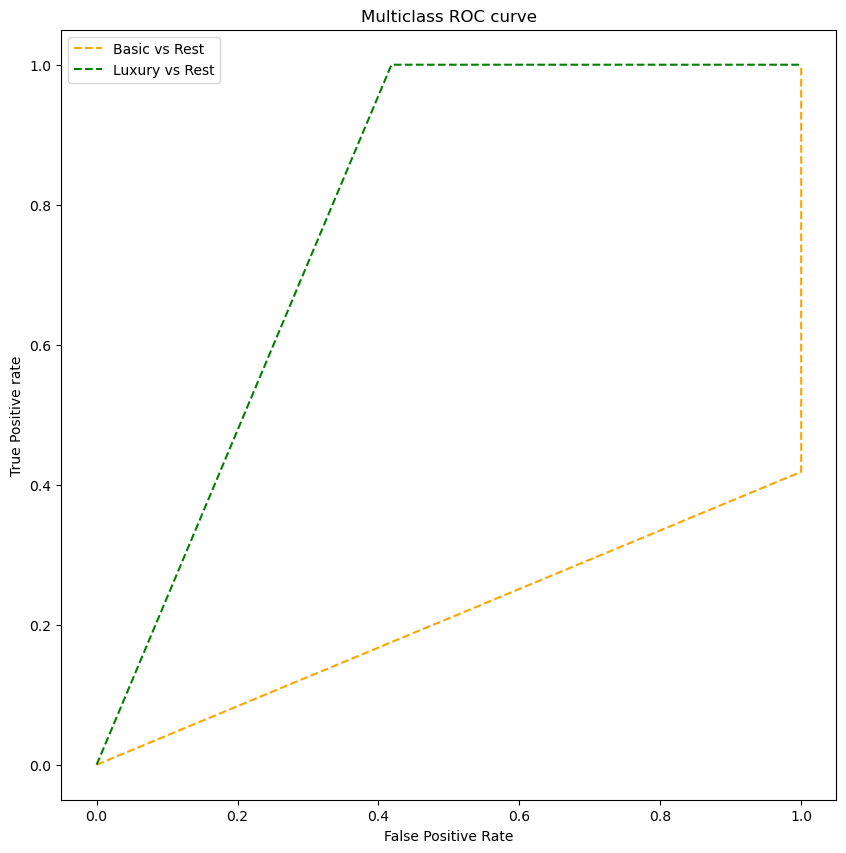

In [176]:
#ROC Curve
fpr = {}
tpr = {}
thresh = {}

n_class = 2

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test_to_numerik, y_score_model_1, pos_label=i)

plt.figure(figsize=(10,10))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Basic vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Luxury vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300)
plt.show()

In [177]:
#lakukan proses evaluasi model algoritme pembelajaran 2
gs_Predict_model_2 = grid_search_model_2.predict(X_test_Enc)
Label = ['Basic', 'Luxury']

print("Confusion Matrix : \n", confusion_matrix(Y_test_to_numerik, gs_Predict_model_2))
print("Classification Report : \n", classification_report(Y_test_to_numerik, gs_Predict_model_2, target_names=Label))

Confusion Matrix : 
 [[107  77]
 [  0 216]]
Classification Report : 
               precision    recall  f1-score   support

       Basic       1.00      0.58      0.74       184
      Luxury       0.74      1.00      0.85       216

    accuracy                           0.81       400
   macro avg       0.87      0.79      0.79       400
weighted avg       0.86      0.81      0.80       400



In [178]:
clf_model_2 = OneVsRestClassifier(grid_search_model_2.best_estimator_)
clf_model_2.fit(X_train_Enc, Y_train_to_numerik)
y_score_model_2 = clf_model_2.predict(X_test_Enc)

print("ROC AUC Score : %.3f" %roc_auc_score(Y_test_to_numerik, y_score_model_2))

ROC AUC Score : 0.791


Text(0, 0.5, 'True Positive rate')

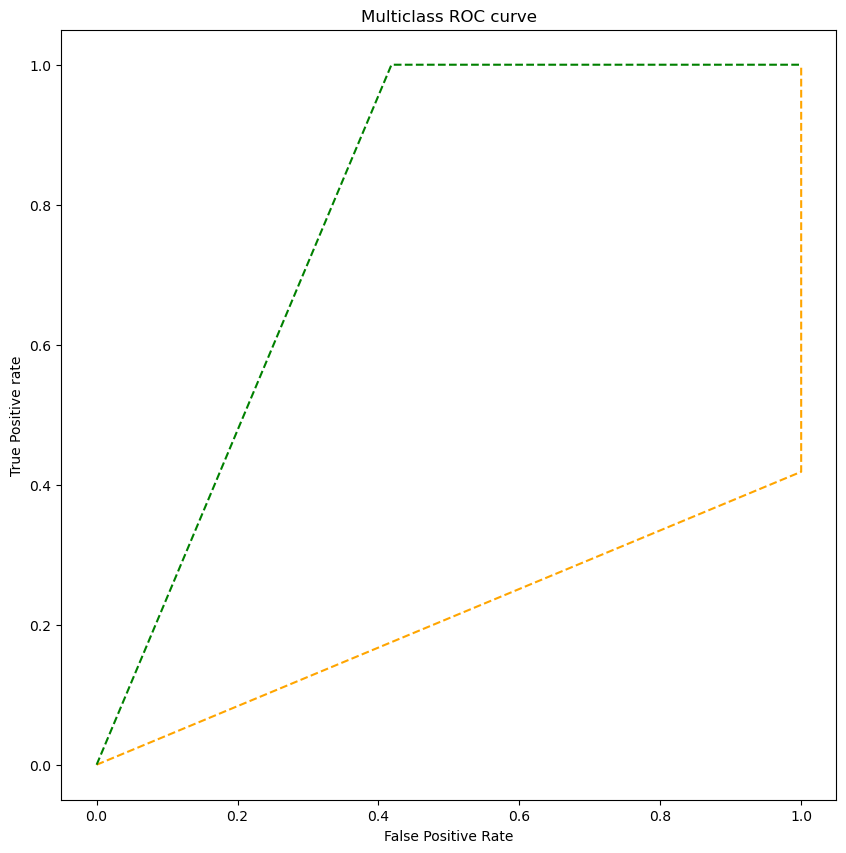

In [179]:
#ROC Curve
fpr = {}
tpr = {}
thresh = {}

n_class = 2

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test_to_numerik, y_score_model_2, pos_label=i)

plt.figure(figsize=(10,10))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Basic vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Luxury vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

## Kesimpulan

Silahkan jawab pertanyaan berikut:

1. Apa saja feature-feature yang penting untuk membedakan antara rumah basic dan luxury? 

2. Model apakah yang memiliki performa paling baik terhadap dataset? Apakah parameter setting yang paling optimal dari model tersebut?

*tulis jawaban Anda di cell ini*

1. ['onehotencoder__isNewBuilt_N', 'onehotencoder__isNewBuilt_Y',
'remainder__hasGuestRoom']
2. Model ke 2 memiliki performa paling baik terhadap dataset. Parameter setting yang paling optimal dari model tersebut adalah
{'Feature_Selection': SelectKBest(k=3), 'classifier__C': 1, 'scaler': None}
dan best score nya adalah 0.778